# Neste notebook estarei buscando responder:

Qual o serviço mais contratado?

Qual a distribuição dos serviços por esfera de governo?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
sns.set(style = 'whitegrid')

ARQ = '../base_dados/bd_2.csv'

df = pd.read_csv(
    ARQ,
    sep = ';',
    decimal = ',',
    encoding = 'latin1'
)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

df['pp_consorcio'] = df['pp_consorcio'].round(4)

### Qual o serviço mais contratado?

Aqui estamos analisando os **serviços contratados**.

O gráfico a seguir exibe os **serviços contratados**, ordenado do **menos contratado ao mais contratado**.

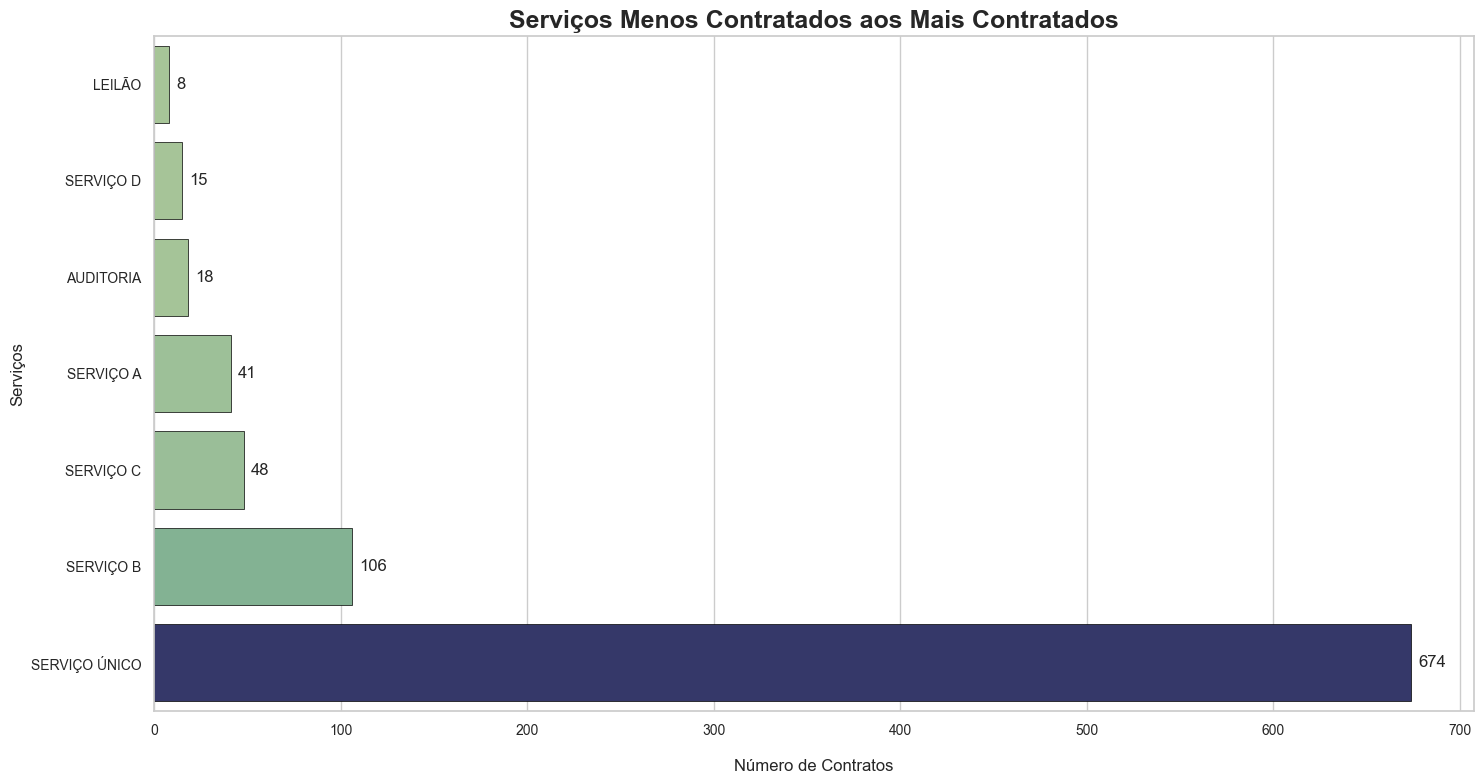

In [28]:
# Padronizando os nomes dos serviços para evitar contagens separadas
df['servico_contratado'] = df['servico_contratado'].str.strip().str.upper()

servicos_mais_contratados = df['servico_contratado'].value_counts(ascending=True).head(7)

# print(df['servico_contratado'].unique())
# Já que temos apenas 7 tipos de serviços, vou listar todos

# print("Os serviços mais contratados são:")
# print(servicos_mais_contratados)

plt.figure(figsize=(15, 8))

grafico = sns.barplot(x=servicos_mais_contratados.values,
                      y=servicos_mais_contratados.index,
                      hue=servicos_mais_contratados,  
                      palette='crest', 
                      edgecolor='black',
                      linewidth=0.5,
                      legend=False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='%.0f', padding=5)

plt.title('Serviços Menos Contratados aos Mais Contratados', fontsize=18, fontweight='bold')
plt.xlabel('Número de Contratos', fontsize=12, labelpad=15)
plt.ylabel('Serviços', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.show()


### Qual a distribuição dos serviços por esfera de governo?

Aqui estamos analisando os **serviços contratados** em relação à **esfera de governo**.

O gráfico a seguir exibe a **distribuição dos serviços contratados por esfera de governo**.

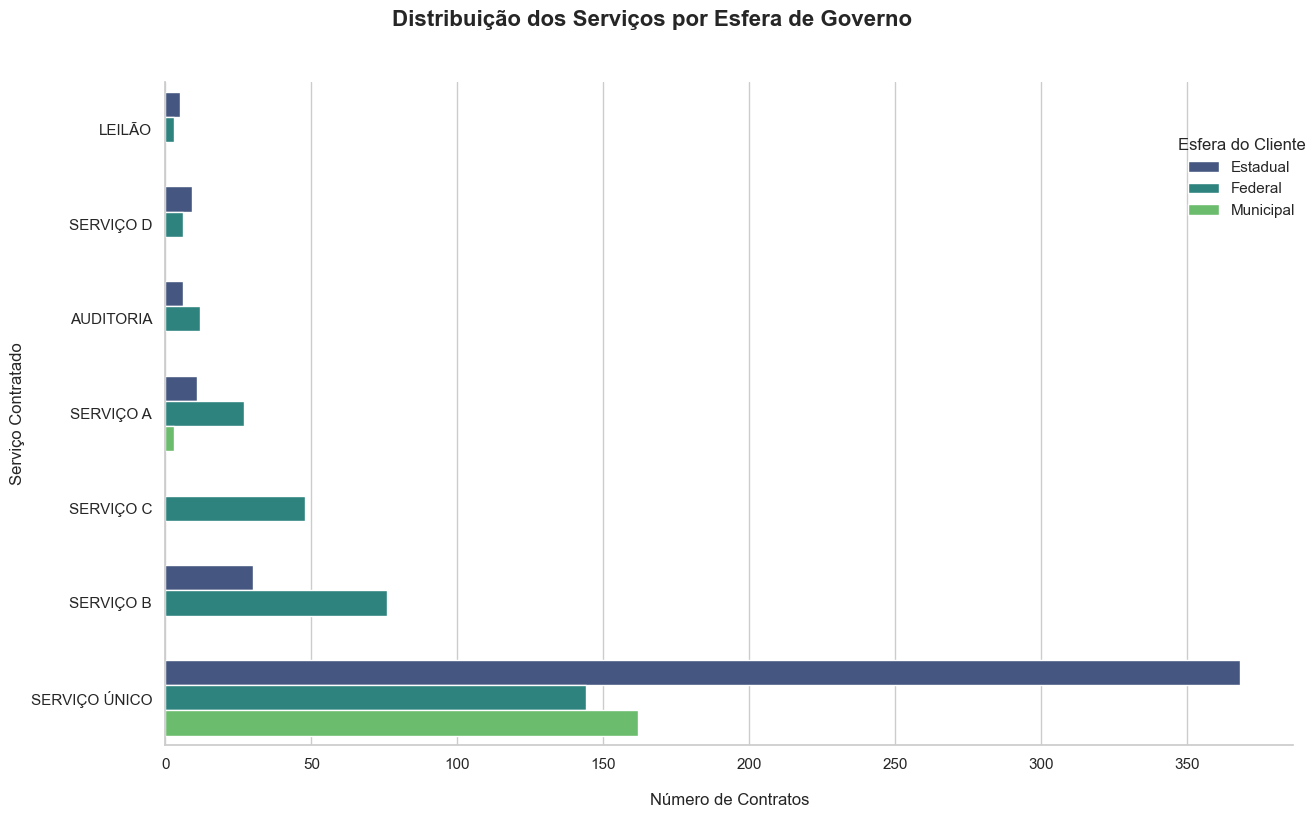

In [45]:
# Padronizando também a coluna 'esfera_cliente'
df['esfera_cliente'] = df['esfera_cliente'].str.strip().str.capitalize()

servicos_lista = servicos_mais_contratados.index.tolist()

df_top_servicos = df[df['servico_contratado'].isin(servicos_lista)]

# Usando catplot para um melhor controle e visualização
grafico = sns.catplot(
    data=df_top_servicos,
    y='servico_contratado',
    hue='esfera_cliente',    
    kind='count',              
    palette='viridis',
    order=servicos_lista, # Mantém a ordem do menos contratado para o mais
    height=8,
    aspect=1.5,
)

grafico.fig.suptitle('Distribuição dos Serviços por Esfera de Governo', fontsize=16, fontweight='bold', y=1.02)
grafico.set_xlabels('Número de Contratos', fontsize=12, labelpad=15)
grafico.set_ylabels('Serviço Contratado', fontsize=12)
grafico._legend.set_title('Esfera do Cliente')
grafico._legend.set_bbox_to_anchor((1, 0.8))

for x in g.axes.flat:
    for container in x.containers:
        x.bar_label(container, fmt='%.0f', padding=2, fontsize=8)

plt.tight_layout()
plt.show()